<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 30px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Datos No Estructurados: NLP</h1>
        <h2 style="color: white; text-align: center;">Fake News Detection</h2>
    </div>

</div>


<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">Realizado por:</h3>
</div>

- Álvaro Ezquerro Pérez
- María Calvo de Mora Román
- Celia Quiles Alemañ


<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 10px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">RNN Y LSTM</h1>
    </div>
</div>


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Introducción</h2>
</div>


En este notebook, exploraremos la aplicación de Redes Neuronales Recurrentes (RNN) y Long Short-Term Memory (LSTM) en el ámbito del Procesamiento de Lenguaje Natural (NLP). Nos centraremos específicamente en la tarea de identificación de fake news, utilizando estas técnicas para construir modelos predictivos capaces de distinguir entre noticias reales y falsas.


Empezamos con una introducción a los conceptos básicos del NLP, incluyendo la tokenización, la eliminación de stopwords, la extracción de características y la construcción de modelos de machine learning para nuestra tarea específica, la identificación de fake news.


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Preprocesado de datos para NLP:</h2>
</div>

En el proceso de identificación de noticias falsas, es fundamental **preprocesar el texto** de manera adecuada para mejorar la calidad de los datos y aumentar la precisión del modelo. Para lograr esto, vamos a implementar una **función de preprocesamiento que incluye el algoritmo de stemming utilizando el Porter Stemmer.**

El objetivo principal del stemming es reducir las palabras a su forma base, lo que nos permite agrupar palabras similares y simplificar el vocabulario. Al **eliminar sufijos y prefijos de las palabras**, el stemming ayuda a normalizar el texto y a capturar mejor la esencia semántica de las palabras, lo que es esencial para identificar patrones y características relevantes en el análisis de texto. [1]

La función de preprocesamiento **comenzará eliminando cualquier caracter que no sea una letra del alfabeto**, convirtiendo todo el **texto a minúsculas** y **dividiéndolo en palabras individuales**. Luego, aplicaremos el **algoritmo de stemming** para reducir cada palabra a su forma base, asegurándonos de que **no se incluyan palabras vacías (stopwords)** en el proceso.

Este enfoque de preprocesamiento nos permitirá mejorar la calidad de los datos al reducir la variabilidad léxica y normalizar el texto, lo que a su vez aumentará la eficacia de nuestro modelo en la identificación de noticias falsas. Al proporcionar una representación más coherente y estructurada del texto, el uso de stemming contribuirá significativamente a la precisión y fiabilidad de nuestro sistema de detección de noticias falsas.

Es decir, la función hará:
1) Quita caracteres que no contenga el alfabeto
2) Pasa a minúsculas todo el texto
3) Divide el texto en palabras individuales
4) Stemming  para quitar prefijos/ sufijos
5) Elimina stopwords

### *Si se desea profundizar en este preprocesado, acuda al notebook `2.Preprocess_for_NLP.ipynb`.*

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Reshape

from keras.models import load_model

2024-04-29 08:37:38.327329: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/df_preprocessed.csv')
df.head()

,contenido,fake
0,fake news updat newsweek report caught lie tru...,1
1,britain may parti leader agre tackl sexual har...,0
2,secret dump toxic wast privat properti epa gov...,1
3,yemen houthi say shot u surveil drone state ne...,0
4,japan aso retract hitler comment critic tokyo ...,0


*Este preprocesado tarda unos minutos. En consecuencia, para no tener que ejecutar este paso cada vez, los textos tras ser preprocesados han sido guardados y ahora solo los cargamos en el notebook de vuelta.*

##### Split entre X e y + Vectorización del texto:

Una vez el texto tiene esos arreglos realizados, pasamos a separar entre target del problema (columna `fake`, será la `y` del problema), y cuál será el input (columna `contenido`, será la `X`del problema).


Además, la `X` al ser una columna de texto, tendremos que transformarla en numérica para su futuro procesamiento.

Para ello, utilizamos la función `TfidfVectorizer()`. 

El TfidfVectorizer() es una técnica comúnmente utilizada en el procesamiento de lenguaje natural (NLP) para convertir texto en representaciones numéricas que son adecuadas para su uso en modelos de aprendizaje automático. "Tfidf" significa "Term Frequency-Inverse Document Frequency", que son los componentes clave de este método. [2]

Al utilizar TfidfVectorizer(), transformamos el texto de la columna de entrada (en este caso, la columna 'contenido' que contiene el texto de las noticias) en una representación numérica que captura la importancia relativa de cada palabra en cada documento. Esto es esencial para alimentar los datos de texto a un modelo de aprendizaje automático, ya que los modelos generalmente requieren entradas numéricas. Además, el uso de TF-IDF ayuda a resaltar las palabras más relevantes y distintivas en el conjunto de datos, lo que puede mejorar el rendimiento del modelo.

In [10]:
X = df['contenido'].values
y = df['fake'].values

In [11]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [12]:
print(X[5])

  (0, 88056)	0.02262947068956131
  (0, 87985)	0.07825556953703679
  (0, 86633)	0.011880290851105977
  (0, 86620)	0.03046129722904228
  (0, 86430)	0.05772855227458127
  (0, 86176)	0.025410432525873446
  (0, 85964)	0.06935862158914127
  (0, 85962)	0.029286987350223056
  (0, 85930)	0.03888837679391029
  (0, 84745)	0.01937550394573734
  (0, 83348)	0.016632629490408852
  (0, 82293)	0.01861283472952836
  (0, 80447)	0.015472029539560972
  (0, 80280)	0.0199416556823626
  (0, 80220)	0.02393528590742644
  (0, 79543)	0.023875743433825095
  (0, 79536)	0.03401455238343119
  (0, 78912)	0.06496229143459378
  (0, 78700)	0.07825556953703679
  (0, 78624)	0.041807815022772414
  (0, 77683)	0.020164050894762045
  (0, 77546)	0.017906780982264645
  (0, 77540)	0.03847057515695578
  (0, 76747)	0.03126444497522105
  (0, 75889)	0.03121495043082615
  :	:
  (0, 13440)	0.0387371213836618
  (0, 12311)	0.028611742419423318
  (0, 11422)	0.031030810071358005
  (0, 11407)	0.02773613491351304
  (0, 11290)	0.0506892445935

Como se aprecia, gracias a esta última transformación ya tenemos el texto vectorizados y listo para el análisis.

##### Split entre train y test:

Hemos decidido que vamos a entrenar con el 80% de los registros, y usaremos como conjunto d eprueba el 20% restante.
Además, realizamos esta división de manera estratificada, para que train y test tengan la misma proporción de fake news.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    stratify=y, 
                                                    random_state=999)



In [23]:
print('Noticias para entrenar:', X_train.shape[0])
print('Noticias para predecir:', X_test.shape[0])

Noticias para entrenar: 35918
Noticias para predecir: 8980


<div style="padding: 25px;">
    <h2 style="color: #1e355f; font-weight: bold;">--- MODELIZACIÓN CON DEEP LEARNING ---</h2>
</div>

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Redes Neuronales Recurrentes (RNN) en NLP:</h2>
</div>

Las Redes Neuronales Recurrentes (RNN) son una arquitectura de red neuronal especialmente diseñada para procesar secuencias de datos, como texto o series temporales. La capacidad de las RNN para recordar información de pasos anteriores las hace ideales para modelar la estructura secuencial del lenguaje humano. [3]

#### Ventajas de las RNN en NLP para la identificación de fake news:

1. `Modelado de secuencias`: Las RNN son ideales para modelar secuencias de texto, lo que las hace adecuadas para capturar la estructura temporal y contextual de las noticias.
2. `Captura de dependencias a largo plazo`: Las RNN tienen la capacidad de capturar dependencias a largo plazo en las secuencias de texto, lo que les permite identificar patrones complejos que pueden ser indicativos de fake news.
3. `Adaptabilidad a diferentes longitudes de texto`: Las RNN pueden manejar secuencias de longitud variable, lo que las hace robustas frente a noticias de diferentes longitudes.

#### Inconvenientes de las RNN en NLP para la identificación de fake news:

1. `Problema de desvanecimiento y explosión del gradiente`: Las RNN pueden sufrir del problema de desvanecimiento o explosión del gradiente, lo que puede dificultar el entrenamiento de modelos con secuencias muy largas.
2. `Difícil captura de dependencias a largo plazo`: A pesar de su capacidad teórica para capturar dependencias a largo plazo, las RNN pueden tener dificultades para hacerlo en la práctica, especialmente en tareas que requieren comprensión profunda del contexto.

### RNN entrenada
En concreto, vamos a ejecutar una RNN que clasifique texto como verdadero o falso las noticias que recibe como entrada. La RNN está definida de la siguiente manera:

- La red consiste en una capa densa de 64 neuronas con activación ReLU seguida de una capa de salida con activación sigmoide. 
- Se utiliza la función de pérdida de entropía cruzada binaria y el optimizador Adam para el entrenamiento. 
- Se han seleccionado 3 epochs y un batch size igual a 128.
- En lugar de usar embeddings, hemos preferido usar TfidfVectorizer().

Finalmente, se evalúa el modelo en los datos de prueba y se imprime la precisión obtenida.

In [24]:
# Definición del modelo de RNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo y almacenamiento del historial
history = model.fit(X_train, Y_train, epochs=3, batch_size=128, validation_data=(X_test, Y_test))

# Evaluación del modelo
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)
accuracy = (y_pred == Y_test.reshape(-1, 1)).mean()
print(f'Accuracy: {accuracy}')

/opt/anaconda3/envs/ML2/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9137 - loss: 0.3865 - val_accuracy: 0.9792 - val_loss: 0.0801
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9896 - loss: 0.0548 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9971 - loss: 0.0238 - val_accuracy: 0.9900 - val_loss: 0.0330
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9899777282850779


Como se observa en la salida, a medida que hemos avanzado en las epochs, hemos ido mejorando los resultados, llegando a alcanzar una accuracy de hasta el 99% de acierto tanto en train como en test.

In [27]:
# Guardamos el modelo entrenado
model.save('../models/modelo_rnn_3epochs.keras')

# Si quisiéramos cargar el modelo en otro momento usando:
# model_rnn = load_model('modelo_rnn.h5')

#### Evolución Accuracy y Loss

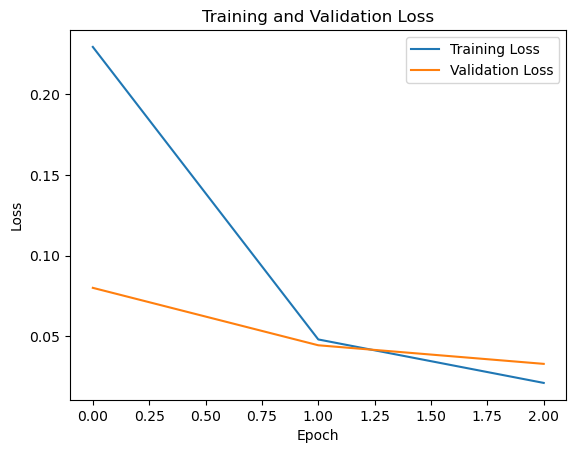

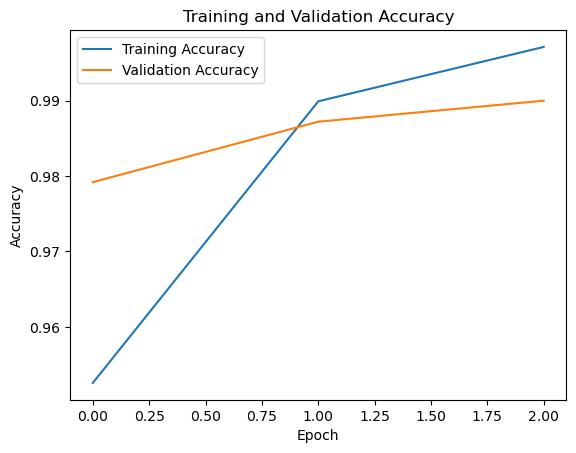

In [28]:
# Acceder a las métricas de pérdida y precisión
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot de la pérdida
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot de la precisión
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Matriz de confusión (test)

In [29]:
# Obtener las probabilidades de predicción
Y_pred_proba = model.predict(X_test)

# Convertir probabilidades en clases binarias usando un umbral (por ejemplo, 0.5)
Y_pred = (Y_pred_proba > 0.5).astype(int)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)

conf_matrix


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4227,   57],
       [  33, 4663]])

Continuando con el análisis, se observa cómo de las 8980 noticias del conjunto de prueba, la RNN entrenada llega a clasificar correctamente 8890 de ellas.

De entre las 90 mal clasificadas, 57 se corresponden con errores de tipo I, y tan solo 33 a errores de tipo II.
Recordemos de otros notebooks, cómo en nuestro caso el error a minimizar es el de tipo II, pues implica catalogar como noticia real, noticias que realmente son fake.

De manera que, esta RNN muestra resultados verdaderamente acertados.

No obstante, vamos a entrenar una LSTM a continuación.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Long Short-Term Memory (LSTM) en NLP:</h2>
</div>

Las Long Short-Term Memory (LSTM) son una variante de las RNN diseñada para abordar el problema del desvanecimiento del gradiente, un problema común en el entrenamiento de RNN. Las LSTM son capaces de aprender dependencias a largo plazo en secuencias de datos gracias a su arquitectura especializada. [4]

#### Ventajas de las LSTM en NLP para la identificación de fake news:

1. `Capacidad para aprender dependencias a largo plazo`: Las LSTM son capaces de capturar dependencias a largo plazo en las secuencias de texto, lo que les permite comprender mejor el contexto y la estructura del lenguaje humano.
2. `Resolución del problema de desvanecimiento del gradiente`: Gracias a su estructura interna, las LSTM pueden mitigar el problema del desvanecimiento del gradiente y mantener un aprendizaje estable durante el entrenamiento.
3. `Aplicabilidad en tareas complejas de NLP`: Las LSTM son especialmente útiles en tareas de NLP que requieren comprensión profunda del contexto y modelado de secuencias complejas, como la identificación de fake news.

#### LSTM entrenada

Como hemos mencionado, para continuar con la taarea de clasificación de fake news, entrenamos la siguiente LSTM:

- La arquitectura de la red consiste en una capa LSTM con 64 unidades seguida de una capa densa de salida con activación sigmoide.

- Para preparar los datos de entrada para la LSTM, se han convertido las matrices dispersas en matrices densas y se han remodelado para que tengan la forma adecuada para la capa LSTM.

- El modelo LSTM se ha compilado utilizando el optimizador Adam y la función de pérdida de entropía cruzada binaria. Se ha utilizado la métrica de precisión para evaluar el modelo.

- El modelo se ha entrenado durante 3 epochs con un tamaño de lote= baatch size de 128. 



In [38]:
# Convertir matrices dispersas a matrices densas
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Reshape de los datos de entrada para que tengan la forma correcta para LSTM
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

# Definición del modelo LSTM
model_lstm = Sequential([
    LSTM(units=64, input_shape=(1, X_train_dense.shape[1])),
    Dense(units=1, activation='sigmoid')
])

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo y almacenamiento del historial
history_lstm = model_lstm.fit(X_train_reshaped, Y_train, epochs=3, batch_size=128, validation_data=(X_test_reshaped, Y_test))

# Evaluación del modelo
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_reshaped, Y_test)
print(f'Loss: {loss_lstm}, Accuracy: {accuracy_lstm}')


Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 122s 424ms/step - accuracy: 0.9089 - loss: 0.4660 - val_accuracy: 0.9749 - val_loss: 0.0916
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 108s 380ms/step - accuracy: 0.9842 - loss: 0.0659 - val_accuracy: 0.9867 - val_loss: 0.0459
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 117s 413ms/step - accuracy: 0.9962 - loss: 0.0240 - val_accuracy: 0.9902 - val_loss: 0.0326
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9910 - loss: 0.0328
Loss: 0.03261508792638779, Accuracy: 0.9902004599571228


In [39]:
model_lstm.save('../models/modelo_lstm_3epochs.keras')

Tal y como ocurría en la RNN, a medida que avanzamos en epochs, la accuracy va mejorando, alcanzando el 99% de aciertos tanto en el conjunto de entrenamiento como en el de prueba.

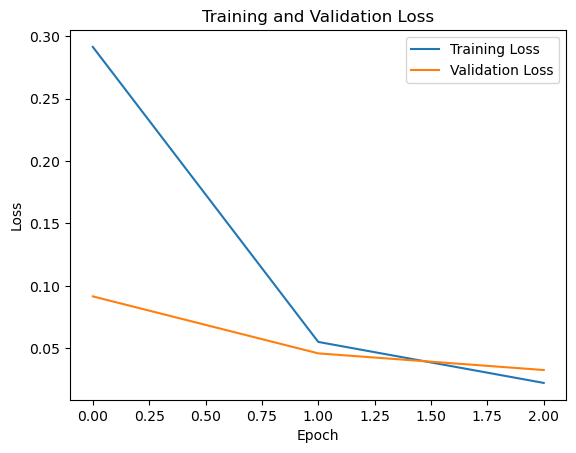

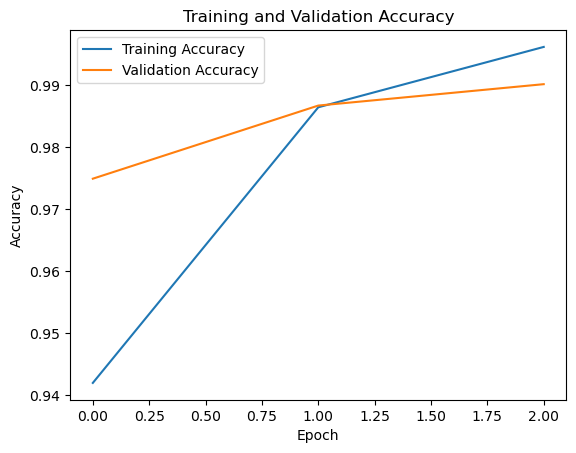

In [40]:
# Acceder a las métricas de pérdida y precisión
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']

# Plot de la pérdida
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot de la precisión
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Obtener las probabilidades de predicción
Y_pred_proba = model_lstm.predict(X_test_reshaped)

# Convertir probabilidades en clases binarias usando un umbral (por ejemplo, 0.5)
Y_pred = (Y_pred_proba > 0.5).astype(int)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)

conf_matrix


281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step


array([[4234,   50],
       [  38, 4658]])

Finalizando con el análisis, se observa cómo de las 8980 noticias del conjunto de prueba, la RNN entrenada llega a clasificar correctamente 8892 de ellas (2 más que en la RNN).

De entre las 88 mal clasificadas, 50 se corresponden con errores de tipo I (antes con RNN eran 50), y 38 a errores de tipo II (antes 33). Recordemos de otros notebooks, cómo en nuestro caso el error a minimizar es el de tipo II, pues implica catalogar como noticia real, noticias que realmente son fake.

Los resultados obtenidos son muy positivos, prácticamente no hay errores.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Comparación rendimiento RNN vs LSTM:</h2>
</div>

Como hemos demostrado en un caso y otro, **ambos modelos tienen un rendimiento espectacular** en la tarea de identificar fake news, **con porcentajes de acierto de hasta el 99% tanto en train como en test.**

Las LSTM, como se ha explicado en su apartado, los redes neuronales profundas que se desarrollaron con tal de mejorar el rendimiento de las RNN a la hora de capturar patrones secuenciales, como en nuestro caso, patrones dnetro del texto. Sin embargo, **en nuestro caso, al ser noticias no demasiado extensas, LSTM no aporta ninguna ventaja significativa.**

De hecho, la diferencia en la velocidad de entrenamiento entre las RNN y las LSTM ha sido notoria; **la segunda ha tardado mucho más en entrenarse** y en obtener las predicciones. Además, en cuanto a los errores de tipo II, que son los que queremos evitar a toda costa, **han sido mayores estos errores en la LSTM que en la RNN.**


**Con todo esto puesto sobre la mesa, preferimos quedarnos con una RNN para nuestro problema de identificar fake news.**

---
---

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Referencias:</h2>
</div>


[1] Seobility. (s. f.). ¿Qué es el Stemming? - Seobility Wiki. https://www.seobility.net/es/wiki/Stemming

[2] Data, S. B. (2019, 23 diciembre). Machine Learning Procesamiento de texto – sitiobigdata.com. https://sitiobigdata.com/2019/12/23/machine-learning-procesamiento-de-texto/

[3] ¿Qué es una RNN?: Explicación sobre redes neuronales recurrentes: AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/recurrent-neural-network/

[4] Qué es LSTM: Long short-term memory Concepto y definición. Glosario. (s. f.). GAMCO, SL. https://gamco.es/glosario/lstm-long-short-term-memory/
